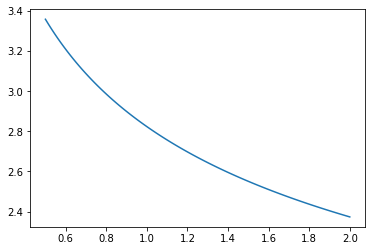

In [1]:
#%matplotlib notebook
import sys
sys.path.append("/u/yali/script/Plots")
from Plots import plot_static
from plot_static import plot_single
from Plots import plot_animate
from plot_animate import plots
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
r = np.linspace(0.5, 2, 100)
y = 2.823*r**(-0.25)
plt.plot(r, y)

# Initial Condition Verification

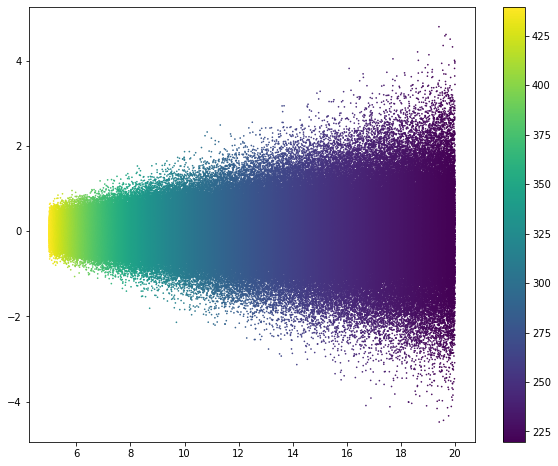

In [4]:
a = plot_single("gDisk1","", 0)
#a.scatter_qty("3d", "dens")
#fig = plt.figure(figsize = (10, 10))
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=40., azim=40.)
#ax.scatter(a.coordx[a.coordy > 50], a.coordy[a.coordy > 50], a.coordz[a.coordy > 50], s = 0.005)#, c =  a.dens)
#ax.scatter(a.coordx[(a.phi<0.1)&(a.phi>-0.1)], a.coordy[(a.phi<0.1)&(a.phi>-0.1)], a.coordz[(a.phi<0.1)&(a.phi>-0.1)], s = 0.05)
#ax.scatter(a.coordx, a.coordy, a.coordz, s = 0.05)
#plt.scatter(a.coordx[a.coordy > 50], a.coordz[a.coordy > 50], s = 0.8, c = a.dens[a.coordy > 50])
#plt.colorbar()
#plt.xlim(50, 70)
#plt.ylim(49, 69)
#a.scatter_qty("xy", "temp")
#plt.figure(figsize = (10, 10))
#plt.scatter(a.rad, a.vel_mag/(a.Omega_K*a.rad))#a.AspectRatio)
#plt.xlim(6, 8)
#plt.ylim(0, 0.0001)
plt.figure(figsize = (10, 8))
plt.scatter(a.rad, a.height, s=0.4, c = a.temp)
plt.colorbar()

NameError: name 'r_o' is not defined

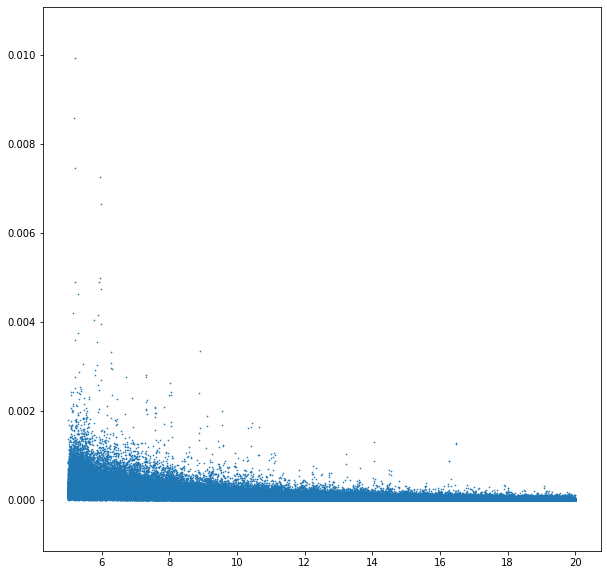

In [6]:
#a.scatter_qty("xy", "temp")
#a.qty_qty("rad", "specAngMom")
plt.figure(figsize = (10, 10))
plt.scatter(a.rad, a.dens, s =0.4)
r = np.linspace(0, 25, 200)

UnitLength_in_cm = 1.496e13     
UnitMass_in_g = 1.989e33        
UnitVelocity_in_cm_per_s = 474318.3259 

G = 39.4429 # G = 6.6743e-11*(UnitMass_in_g/1000)/(UnitLength_in_cm/100*(UnitVelocity_in_cm_per_s/100)**2)
gamma_eos = 1.001           # polytropic index of ideal equation of state the run will assume
k_B = 1.38064852e-23/(((UnitVelocity_in_cm_per_s)/100)**2 * (UnitMass_in_g/1000))   # 1.38064852e-23 m2 kg s-2 K-1
mu = 2.3;   proton_mass = 1.6726219e-27/(UnitMass_in_g/1000);   mean_molecular_weight = mu*proton_mass

def midp(r):
    Q_for_normalize = 2         # Q = c_s*Omega/(np.pi*G*Sigma), normalised s.t. Q(r=r_o) = Q_for_normalize 
    
    Sigma_0 = 0.1/(2*np.pi*(20-5))
    r_o = 20; r_i = 5
    def Temp(r):
        res = (Q_for_normalize*np.pi*G*Sigma_0/r_o)**2/((k_B*r_o**(-0.5)/mean_molecular_weight)*(G*0.1/r_o**3)) * r**(-0.5)
        res[(r < r_i) | (r > r_o)] = 200
        return res
    def c_s(r):                 # speed of sound
        return (k_B * Temp(r)/mean_molecular_weight)**0.5     
    def Omega_K(r):             # Keplerian angular speed
        return (G*0.1/r**3)**0.5 
    def vertical_scale_h(r):
        return c_s(r) / Omega_K(r)
    return Sigma_0/r/(vertical_scale_h(r)*(2*np.pi)**0.5)


plt.plot(r, midp(r), "b")
plt.xlim(4.5, 20.5)
plt.ylim(0, 0.0002)
#r = np.linspace(4, 20, 100)
#plt.plot(r, np.sqrt(a.GravityConstantInternal*a.m_star*r), "y", linewidth = 3)
plt.show()

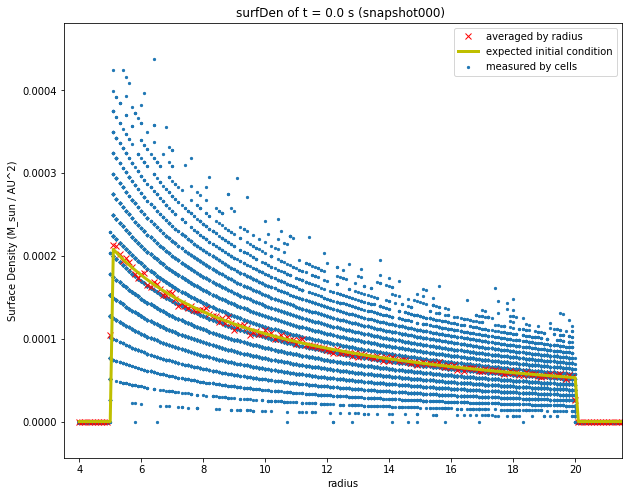

In [3]:
a.grid_qty("surfDen","radial")

In [ ]:
#a.grid_qty("Toomre", "radial")
#a.scatter_qty("rz", "vel_mag")
#plt.scatter(a.rad, a.vel_mag)

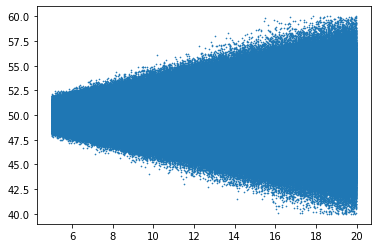

In [59]:
#cur = plot_single("gDisk1","", 40)
#cur.grid_qty("surfDen", "xy")
plt.scatter(a.rad, a.coordz, s = 0.4)
#plt.yscale("log")
#plt.ylim(0., 0.0001)

In [ ]:
c = plots("gDisk1")

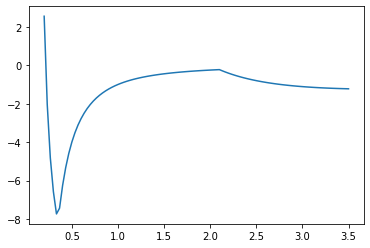

In [12]:
# 2d Keplerian Disk gravity setup

import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.2, 3.5, 100)
res = []
for a in x:
    if a < 0.35:
        res.append(1/a**2*(1-a/0.35-(a/0.35)**2))
    elif a > 2.1:
        res.append(-1/a**2*(1+(a-2.1)/0.1))
    else:
        res.append(-1/a**2)
plt.plot(x, res)

In [ ]:
#plot2d.make_video("gDisk1", 2, "rad", "temp")


#from Plots import ytplot
#from Plots import ipvplot
#from ipywebrtc import VideoRecorder

 # optionally, we can record the v ideo
    #rec = MediaRecorder(stream=fig)
    #
    #rec.record = False
    
    # record video
#recorder = VideoRecorder(stream=fig)
#recorder 
    
    #recorder.save()
    #ipv.save('viz-3d-stream.html')
    
    #with open('viz-3d-stream.webm', 'wb') as f:
    #    f.write(rec.data)